# Integração Numérica

## Revisão de derivada

Suponhamos que nosso sistema é descrito por uma função $x(t)$. Nosso sistema é descrito por uma função do tempo porque ele é um sistema dinâmico, ou seja, ele evolui de um estado anterior para um estado seguinte de acordo com o tempo. 

No entanto, ao utilizarmos a teoria de sistemas dinâmicos como ferramenta, raramente descrevemos nossos sistemas através de funções "explícitas". Isso ocorre porque é muito difícil para nós conhecermos o comportamento global do sistema antes de estudá-lo. Por exemplo, se estamos estudando o crescimento de uma colônia de bactérias da espécie *E. coli*, a princípio nós não sabemos como parâmetros específicos de taxa de crescimento, eficiência metabólica, meio de cultura etc, afetam esse crescimento, especialmente quando comparados com os de outras espécies, como *B. subtilis*.

Portanto, frequentemente descrevemos nosso sistema através de equações de equações diferenciais, ou seja, derivadas. Relembre que uma derivada pode ser vista como uma "velocidade instantânea" ou uma taxa de variação. Podemos até não conhecer o comportamento global $x(t)$ do nosso sistema (por exemplo, como a nossa colônia de bactérias se desenvolve ao longo de todo o tempo), mas é muito mais prático para nós como pesquisadores determinarmos como o sistema se comporta no instante específico em que podemos observá-lo. Nós podemos então tentar descrever como esperamos que o sistema se comporte a cada instante que observamos, e por isso utilizamos derivadas. 

Outra forma de interpretar a derivada é como uma aproximação de uma função. Na figura 1 abaixo, esse processo de aproximação é esquematizado. Nós temos em azul a função $x(t)$ que queremos aproximar, que é não-linear. Em vermelho nós tentamos aproximar a função $x(t)$ durante o invervalo que vai de $t_0$ à $t_1$, através de sua derivada ($\frac{dx}{dt}$), que é uma função linear cujo gráfico é uma reta de inclinação $\theta$.

<img src="https://raw.githubusercontent.com/preigemufc/1.2016.1.notebooks/master/eulers_method.png" alt="Método de Euler" style="width:500px;height:400px;">
> **Figura 1.** Esquema de aproximação de uma função não-linear $x(t)$ através de sua derivada $\frac{dx}{dt}$, que por sua vez pode ser aproximada por $\frac{\Delta x}{\Delta t}$. Observe que, por geometria, a razão $\frac{\Delta x}{\Delta t}$ é dada pela tangente do ângulo $\theta$ descrito pela reta no intervalo de aproximação.

Observe que a aproximação não é perfeita, pois a reta vermelha não fornece exatamente os mesmos valores da curva azul dentro do intervalo $[t_0,t_1]$, a não ser pelos próprios pontos $t_0$ e $t_1$, onde os gráficos concordam perfeitamente. Lembre que pela definição de derivada, para termos uma aproximação perfeita no instante $t$, nós devemos aproximar a curva $x(t)$ dentro de um intervalo $\Delta t = t_1 - t_0$ o menor possível, e representamos esse processo de minimizar o intervalo $t_1 - t_0$ através de um operador chamado limite.
$$
\frac{dx}{dt} = \lim_{\Delta t \rightarrow 0} \frac{\Delta x}{\Delta t} = \lim_{t_0 \rightarrow t_1} \frac{x(t_1) - x(t_0)}{t_1 - t_0}
$$

## Integração de Euler

De posse desses conhecimentos, podemos utilizar a derivada $\frac{dx}{dt}$ para aproximarmos a função $x(t)$ em cada ponto da órbita do nosso sistema. Relembre o conceito de *órbita* (ou *trajetória*) de um sistema dinâmico.
> **Definição.** *A órbita de um sistema dinâmico é o conjunto de pontos por ele visitados a cada intervalo de tempo.* 

Para observar a órbita do nosso sistema, precisamos escolher um valor inicial $x(t_0)$. Em seguida, calculamos a posição do sistema no instante seguinte por $x(t_1) = x(x(t_0))$. Depois, repetimos o procedimento, $x(t_2) = x(x(t_1))$ e assim por diante, até o instante $t_n$. A posição no instante $t_n$ é dada por 

\begin{equation}
\begin{array}{c}
 \underbrace{x(x(...(x(t_0))))} \\ n \textrm{ vezes}
\end{array} =
\begin{array}{c}
 \underbrace{x \circ x \circ ... \circ x(x(t_0))} \\ n \textrm{ vezes}
\end{array} =
x^n(t_0)
\end{equation}

Nós vamos utilizar informações sobre a derivada de $x(t)$ para estimarmos o valor de $x(t_n)$ em cada intervalo $t_n$, e assim fazermos uma aproximação do comportamento global do nosso sistema a partir de uma condição inicial $x(t_0)$. Vamos aproximar a derivada $\frac{dx}{dt}$ através de $\tan(\theta_n)$ dentro do intervalo $\Delta t_n = t_n - t_{n - 1}$. Assim, podemos olhar para a definição de derivada acima e ver como podemos estimar o valor de $x(t_n)$ no instante $t_n$ a partir de $x(t_{n - 1})$:

$$
\frac{dx}{dt} \approx \tan(\theta_n) = \frac{\Delta x}{\Delta t_n} = \frac{x(t_n) - x(t_{n - 1})}{t_n - t_{n - 1}}
$$

Ou seja,

\begin{eqnarray}
\tan(\theta_n) = \frac{\Delta x}{\Delta t_n}  \\
\Delta x = \Delta t_n \tan(\theta_n) \\
x(t_n) - x(t_{n - 1}) = \Delta t_n \tan(\theta_n) \\
x(t_n) = x(t_{n - 1}) + \Delta t_n \tan(\theta_n)
\end{eqnarray}

E portanto,

> **Fórmula de integração numérica de Euler**
> $$ x(t_n) \approx x(t_{n - 1}) + \Delta t_n \frac{dx(t_n)}{dt} $$

Dessa forma, temos posse de um método para estimar o estado $x(t)$ do nosso sistema a cada instante $t$. Se nós tivermos posse da derivada da nossa função de estado $\frac{dx}{dt} = f(x)$ como uma função da própria variável de estado $x(t)$, podemos utilizar $f(x)$, um intervalo regular $\Delta t$ e uma condição inicial $x(t_0)$ para substituir na fórmula de integração e estimar $x(t_n)$ a cada intervalo. Mas como traduzir isso para um código de Python? Abaixo nós escrevemos uma linha de código que traduz diretamente a fórmula de integração de Euler para um comando de Python. 

```
x[t_n] = x[t_n - 1] + f(x[t_n - 1])*dt
```

 **Obs.** No código, escrevemos $\Delta t$ como `dt`. Não confunda este `dt` do código com o $dt$ da derivada de $x(t)$.
 
O próximo passo é inserir essa linha de código dentro de um *loop* que repita esse processo a partir de um valor inicial durante um intervalo de tempo determinado por nós e que tenha um tamanho definido para cada passo `dt`. Para isso, precisamos determinar o número de passos que vamos calcular dentro de todo o intervalo de integração. Para tanto, devemos criar variáveis que guardem esses valores. Por fim, é mais conveniente para nós colocarmos todo esse código dentro de uma função do Python definida por nós, porque assim podemos reutilizar este código facilmente para qualquer equação diferencial que pretendermos estudar.

In [1]:
# Antes de tudo, importamos o pacote matemático numpy 
# que nos permite manipular matrizes e vetores.
import numpy as np

# Declaramos uma função onde colocaremos todo o código
# para integração de Euler, que poderemos invocar facilmente
# sempre que quisermos integrar numericamente uma equação
# diferencial.
def solveE(f, x_t0, time, dt):
    'Integra numericamente um sistema de equações diferenciais\
    através do método de Euler. Como argumentos recebe uma\
    função "f", um valor inicial "x_t0", um intervalo de\
    integração "time" e um tamanho de passo "dt". Retorna dois\
    vetores: "t" o eixo do tempo e "x" a trajetória do sistema'    
    # A descrição acima é forma de documentar a nossa função.
    # Abaixo, determinamos o número de passos. Em Python 3,
    # o operador divisão "/" retorna um float (número racional),
    # mas nosso número de passos precisa ser do tipo int.
    steps = int(time/dt)
    # Abaixo nós criamos uma lista que vai de zero até o final
    # do intervalo de integração ("time") em passos de tamanho
    # dt. Ela represente o eixo do tempo "t".
    t = np.arange(0,time,dt)
    x = [0]*(steps)
    # Esta é uma forma de declarar e inicializar uma lista
    # de zeros com tamanho para armazenar todos os passos.
    # A lista "x" armazerá todos os valores x(t).
    # Abaixo armazenamos a condição inicial.
    x[0] = x_t0
    for t_n in range(1,steps):
        # O nosso loop terá "steps" passos e "t" irá variar 
        # de 1 à "steps". O valor de "t" servirá para acessarmos
        # e armazenarmos valores dentro da lista "x".
        x[t_n] = x[t_n - 1] + f(x[t_n - 1])*dt
    # Nossa função retorna a o eixo do tempo "t" e a 
    # trajetória estimada "x" durante esse intervalo.
    # Para podermos plotar gráfitos, precisamos converter "x"
    # de uma lista do Python para um vetor do Numpy.
    return t, x

Escrever uma descrição para documentar nossas funções logo abaixo da sua declaração nos permite extrair informações delas utilizando o comando `help()`.

In [2]:
help(solveE)

Help on function solveE in module __main__:

solveE(f, x_t0, time, dt)
    Integra numericamente um sistema de equações diferenciais    através do método de Euler. Como argumentos recebe uma    função "f", um valor inicial "x_t0", um intervalo de    integração "time" e um tamanho de passo "dt". Retorna dois    vetores: "t" o eixo do tempo e "x" a trajetória do sistema



## Integrando sistemas de equações diferenciais

### Crescimento logístico

Que sistemas de equações diferenciais vamos utilizar para testar nossa função? Podemos utilizar um modelo populacional, no caso, o [crescimento logístico](http://mathworld.wolfram.com/LogisticEquation.html). Suponha que temos uma colônia de bactérias cujo crescimento pode ser estimado através da sequinte equação diferencial:

\begin{eqnarray}
\frac{dx}{dt} = g(x) = xr\left(1 - \frac{x}{K}\right) \\
g(x) = -r\frac{x^2}{K} + rx
\end{eqnarray}

Onde
- **r** crescimento populacional *per capita*
- **K** *capacidade máxima* do meio (população máxima que os recursos do meio podem suportar)

Observe que quando $x = K$, o meio não consegue mais suportar o crescimento e a população para de crescer, $\frac{dx}{dt} = 0$. 

Vamos escrever um código para representar $g(x)$.

In [3]:
def g_x(x, r = .5, k = 10):
    'Determina a taxa de crescimento de uma população "x"\
    de acordo com o modelo logístico.'
    return -r*(x**2)/k + r*x

Nós colocamos as os parâmetros `r` e `k` como variáveis padrão da nossa função `g_x` para que não seja preciso declarar esses valores quando invocarmos a função. Por exemplo:

In [4]:
g_x(10)

0.0

Mas podemos invocar nossa função `g_x` com até 3 argumentos, se quisermos alterar os valores de $r$ e $K$:

In [5]:
g_x(10,.5,20)

2.5

Agora, vamos testar nosso código para integrar equações diferenciais com a equação do crescimento logístico:

In [6]:
x_0 = 1
time = 15
dt = .01
# como a função retorna 2 resultados, nós precisamos
# guardá-los em 2 variáveis, ou então numa lista
t1,x1 = solveE(g_x,x_0,time,dt)

Os comandos abaixo *plotam* um gráfico do nosso sistema.

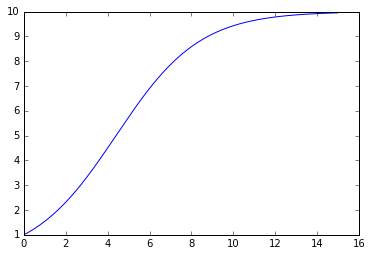

In [7]:
# exibe gráficos neste documento
%matplotlib inline 
# importa o pacote gráfico pylab (Matplotlib)
import pylab as py 
# plota o gráfico
py.plot(t1,x1) 

### Modelo predador-presa de Lotka-Volterra

O que acontece quando temos um sistema com mais do que uma variável de estado? O que acontece, por exemplo, quando temos duas populações evoluindo e interagindo, ao invés de apenas uma? Bom, para estudar isso, nós precisamos de mais do que uma equação diferencial. Entretanto, os métodos que nós utilizamos para uma equação se estendem para sistemas de quaiser número de equações! Nós não precisamos mudar nossa função `solveE`, e podemos estender nossa análise da derivada de $x(t)$ à sistemas de equações envolvendo várias derivadas.

Para demonstrar a função que escrevemos em Python para integrar numericamente sistemas de equações diferenciais, vamos tentar integrar um sistema com duas equações diferenciais. Para modelar um sistema biológico em que duas populações interagem ecologicamente através da predação, [Lotka e Volterra](http://mathworld.wolfram.com/Lotka-VolterraEquations.html) cada um independentemente desenvolveu o seguinte modelo:

\begin{eqnarray}
\frac{dx}{dt} =  ax - bxy \\
\frac{dy}{dt} = -cy + dxy
\end{eqnarray}

Onde

- $x$: população de presas
- $y$: população de predadores
- $a$: taxa de natalidade de presas
- $b$: taxa de predação de $x$ por $y$
- $c$: taxa de mortalidade de predadores
- $d$: eficiência de conversão de biomassa de presa para predador

Vamos escrever uma função em Python que represente o modelo de Lotka-Volterra. Para tanto, como primeiro argumento da nossa função nós temos que passar uma lista `v` com 2 valores, um para cada variável de estado. No corpo da função nós vamos extrair esses valores e lhes dar nomes `x` e `y` apenas por clareza. 

In [8]:
def v_xy(v, a = 1.5, b = 1, c = 3, d = 1):
    'Determina a evolução de um sistema predador-presa\
    do tipo Lotka-Volterra no instante "t". Retorna um\
    vetor "v_n" com "v_n[0]" sendo as presas e "v_n[1]"\
    os predadores.'
    x = v[0]
    y = v[1]
    dx = a*x - b*x*y
    dy = -c*y + d*x*y
    vn = np.array([dx,dy])
    return vn    

**Observação importante.** Na penúltima linha acima nós pegamos a lista `vn` que queremos retornar e a convertemos num vetor no Numpy. Nós fazemos isso para que, durante a etapa de integração do sistema pela função `solveE`, nós possamos multiplicar esse vetor pelo número `dt`. Por exemplo, se você pegar uma lista em Python e tentar multiplicá-la por um número, o seguinte acontece:

In [9]:
[1,2]*3

[1, 2, 1, 2, 1, 2]

Nós precisamos converter essa lista para um vetor do Numpy se não quisermos que nosso código forneça algum erro estranho:

In [10]:
np.array([1,2])*3

array([3, 6])

Abaixo nós integramos o sistema utilizando nossa função. Note que como condição inicial nós passamos uma lista com 2 valores, um sendo a condição inicial de presas $x(t_0)$ e outro sendo a condição inicial de predadores $y(t_0)$. 

In [11]:
v_0 = [10,1]
time = 20
dt = .01
t2,v2 = solveE(v_xy,v_0,time,dt)

Em seguida, nós plotamos o resultado. Devido a que a função `v_xy` retorna uma lista, o processo de extrair os dados fica um pouco mais complicado, e nós vamos omitir a explicação para essa sintaxe.

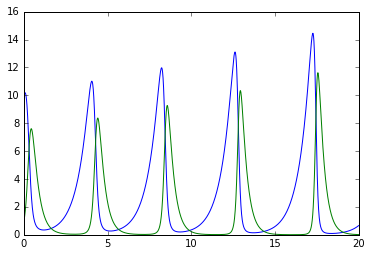

In [12]:
py.plot(t2,np.array(v2).T[0])
py.plot(t2,np.array(v2).T[1])

> **Azul:** presas. **Verde:** predadores.

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.